# Final Exam Project
## Natural Language Processing
Kitti Kresznai <br>
Doris Natalia Cornejo Rojas <br>
Anastasiya Vitaliyivna Strohonova <br>
Natalie Schober <br>

### Data Collection using snscrape

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install textblob
!python -m textblob.download_corpora
!pip install wordcloud
!pip install wordninja
!pip install pyspellchecker
!pip install imblearn==0.0

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-uwb0szi6
ERROR: Package 'snscrape' requires a different Python: 3.7.8 not in '~=3.8'
     |████████████████████████████████| 636 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 9.0 MB/s eta 0:00:01
[nltk_data] Downloading package brown to /home/ucloud/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ucloud/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/ucloud/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/

### Scraping
Below is the code used for scraping, however, for submission we have exported the scraped data into a CSV file due to the fact that snsscrape is only compatible with Python 3.8 or higher.


In [2]:
"""
# text search strings including the specific names of the vaccines
str1 = "covid vaccine" 
str2 = "moderna"
str3 = "pfizer"
str4 = "astrazeneca"
str5 = "sputnik v"
list_of_keywords = [str1, str2, str3, str4, str5]

# snscrape
tweets_df = pd.DataFrame()
for word in list_of_keywords:
    tweet_count = 500
    text_query = word
    since_date = "2020-12-01"
    until_date = ["2020-12-02", "2021-01-02", "2021-02-02", "2021-03-02", "2021-04-02", "2021-05-02"] #ends just before the second of the month
    for date in until_date:
        # Using OS library to call CLI commands in Python
        os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, date))
        df = pd.read_json('text-query-tweets.json', lines=True)
        df['Label'] = word

        if tweets_df.empty:
            tweets_df = df
        else:
            tweets_df = tweets_df.append(df)

print(tweets_df.shape)
tweets_df.head()
"""

'\n# text search strings including the specific names of the vaccines\nstr1 = "covid vaccine" \nstr2 = "moderna"\nstr3 = "pfizer"\nstr4 = "astrazeneca"\nstr5 = "sputnik v"\nlist_of_keywords = [str1, str2, str3, str4, str5]\n\n# snscrape\ntweets_df = pd.DataFrame()\nfor word in list_of_keywords:\n    tweet_count = 500\n    text_query = word\n    since_date = "2020-12-01"\n    until_date = ["2020-12-02", "2021-01-02", "2021-02-02", "2021-03-02", "2021-04-02", "2021-05-02"] #ends just before the second of the month\n    for date in until_date:\n        # Using OS library to call CLI commands in Python\n        os.system(\'snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json\'.format(tweet_count, since_date, text_query, date))\n        df = pd.read_json(\'text-query-tweets.json\', lines=True)\n        df[\'Label\'] = word\n\n        if tweets_df.empty:\n            tweets_df = df\n        else:\n            tweets_df = tweets_df.append(df)\n\npr

### Data Cleaning and Exploratory Data Analysis
Data exported to CSV after initial cleaning (to filter down to data used for the analysis and models). 

In [3]:
"""
# Update datetime to just be the date
tweets_df['date'] = tweets_df['date'].dt.date

# Filter to only english tweets
tweets_df_en = tweets_df['lang'] == 'en'
tweets_df_filtered = tweets_df[tweets_df_en]

# Adding the usernames as a separate column (from the user colum, which has dictionaries as values)
list_of_usernames = []
user_column = tweets_df_filtered['user']
for dic in user_column:
    for key in dic:
        if key == "username":
            list_of_usernames.append(dic[key])

tweets_df_filtered['username'] = list_of_usernames

# Adding the country code as a separate column (from the place colum, which has dictionaries as values)
list_of_countries = []
place_column = tweets_df_filtered['place']
for dic in place_column:
    if dic is not None:
        for key in dic:
            if key == "countryCode":
                list_of_countries.append(dic[key])
    else: list_of_countries.append(None)

tweets_df_filtered['CountryCode'] = list_of_countries

# Filter columns
columns = ['date', 'content', 'renderedContent', 'username', 'CountryCode', 'hashtags', 'Label']
tweets_df_filtered = tweets_df_filtered[columns]

print(tweets_df_filtered.isna().sum())
"""

'\n# Update datetime to just be the date\ntweets_df[\'date\'] = tweets_df[\'date\'].dt.date\n\n# Filter to only english tweets\ntweets_df_en = tweets_df[\'lang\'] == \'en\'\ntweets_df_filtered = tweets_df[tweets_df_en]\n\n# Adding the usernames as a separate column (from the user colum, which has dictionaries as values)\nlist_of_usernames = []\nuser_column = tweets_df_filtered[\'user\']\nfor dic in user_column:\n    for key in dic:\n        if key == "username":\n            list_of_usernames.append(dic[key])\n\ntweets_df_filtered[\'username\'] = list_of_usernames\n\n# Adding the country code as a separate column (from the place colum, which has dictionaries as values)\nlist_of_countries = []\nplace_column = tweets_df_filtered[\'place\']\nfor dic in place_column:\n    if dic is not None:\n        for key in dic:\n            if key == "countryCode":\n                list_of_countries.append(dic[key])\n    else: list_of_countries.append(None)\n\ntweets_df_filtered[\'CountryCode\'] = lis

In [4]:
"""
# Exporting the dataset as a csv file
tweets_df_filtered.to_csv(r'scrapeddata.csv', index = False)
"""

"\n# Exporting the dataset as a csv file\ntweets_df_filtered.to_csv(r'scrapeddata.csv', index = False)\n"

In [5]:
tweets_df_filtered = pd.read_csv('scrapeddata.csv')
tweets_df_filtered

,date,content,renderedContent,username,CountryCode,hashtags,Label
0,2020-12-01,@BillieJeanKing What if the powers that be mad...,@BillieJeanKing What if the powers that be mad...,sasha_mobley,NaN,NaN,covid vaccine
1,2020-12-01,The Daily Beast: Biden's COVID Team Sounds the...,The Daily Beast: Biden's COVID Team Sounds the...,TVyMovies,NaN,NaN,covid vaccine
2,2020-12-01,Biden’s COVID Task Force Member Sounds the Ala...,Biden’s COVID Task Force Member Sounds the Ala...,Edward642537,US,NaN,covid vaccine
3,2020-12-01,A company in America is pushing for an urgent ...,A company in America is pushing for an urgent ...,PublikEnemy15,NaN,NaN,covid vaccine
4,2020-12-01,Modi warns of possible side-effects Indian Pri...,Modi warns of possible side-effects Indian Pri...,concettaeedy,NaN,NaN,covid vaccine
...,...,...,...,...,...,...,...
8121,2021-05-01,@sputnikvaccine How to get? Whom to contact?,@sputnikvaccine How to get? Whom to contact?,HaiderAli58,NaN,NaN,sputnik v
8122,2021-05-01,Russian themselves don't want to be vaccinated...,Russian themselves don't want to be vaccinated...,Polak_Maly,NaN,NaN,sputnik v
8123,2021-05-01,"""A substantial part of the data, approximately...","""A substantial part of the data, approximately...",Sofialmdo,NaN,NaN,sputnik v
8124,2021-05-01,First batch of Russian Sputnik V vaccine to ar...,First batch of Russian Sputnik V vaccine to ar...,AndyVermaut,NaN,NaN,sputnik v


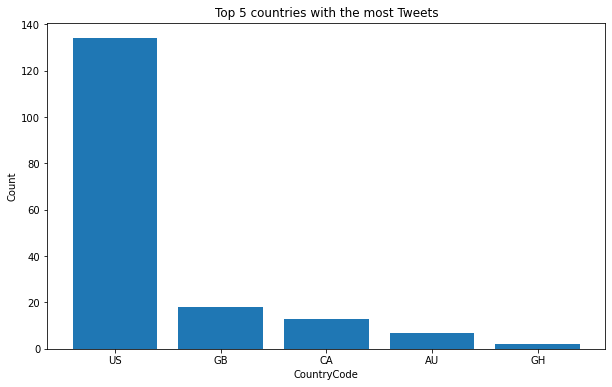

In [6]:
# EDA - Number of tweets in different countries
fig = plt.figure(figsize=(10, 6))
top5_countries = tweets_df_filtered['CountryCode'].value_counts().head(5)
plt.bar(top5_countries.index, height = top5_countries.values)
plt.title('Top 5 countries with the most Tweets')
plt.xlabel('CountryCode')
plt.ylabel('Count')
plt.show()


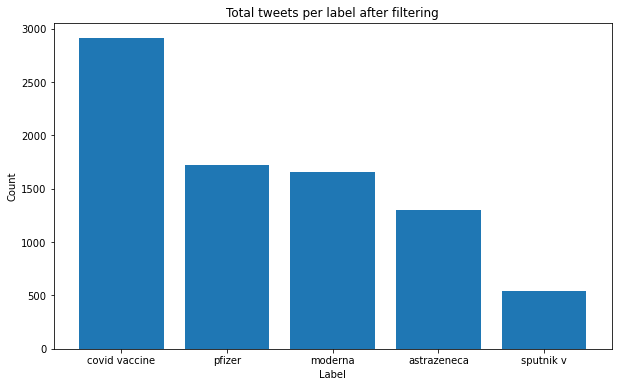

In [7]:
# EDA - Number of tweets per label
fig = plt.figure(figsize=(10, 6))
top5_countries = tweets_df_filtered['Label'].value_counts()
plt.bar(top5_countries.index, height = top5_countries.values)
plt.title('Total tweets per label after filtering')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Text Cleaning & Lemmatization

In [9]:
def preprocess_tweets(tweet):
    for processed_tweet in tweet:
        processed_tweet = tweet
        processed_tweet = processed_tweet.str.lower()  #make all text lowercase
        processed_tweet = processed_tweet.str.replace(r'@\w+', '') #remove @username
        processed_tweet = processed_tweet.str.replace(r'https.*', '') #remove links
        processed_tweet = processed_tweet.str.replace(r'[\n]', ' ') #remove new line (\n) code
        processed_tweet = processed_tweet.str.replace(r'[\xa0]', ' ') #remove new line (\xa0) code
        processed_tweet = processed_tweet.str.replace(r'[^\w\s]', '') #remove non-alphanumeric
        processed_tweet = processed_tweet.str.replace(r'(.)\\1{2,}', r'\1') #remove extra letters when more than two repeats
        processed_tweet = processed_tweet.str.strip() # remove leading and trailing white space
        return(processed_tweet)

tweets_df_filtered['Processed Tweet'] = preprocess_tweets(tweets_df_filtered['content'])

tweets_df_filtered['Processed Tweet'] 

0       what if the powers that be made hiv the same p...
1       the daily beast bidens covid team sounds the a...
2       bidens covid task force member sounds the alar...
3       a company in america is pushing for an urgent ...
4       modi warns of possible sideeffects indian prim...
                              ...                        
8121                           how to get whom to contact
8122    russian themselves dont want to be vaccinated ...
8123    a substantial part of the data approximately 8...
8124    first batch of russian sputnik v vaccine to ar...
8125    first batch of sputnik v vaccine arrives in hy...
Name: Processed Tweet, Length: 8126, dtype: object

In [10]:
# Expand contractions and standardize mentions of Covid-19 to be "covid" for consistency

contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not ",
"can't": "cannot",
"can't've": "cannot have",
"cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is ",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"covid-19": "covid",
"covid 19": "covid",
"covid19": "covid",
"coronavirus": "covid"}


def cont_exp(txt):
    if type(txt) is str:
        for key in contractions:
            value = contractions[key]
            txt = txt.replace(key, value)
        return txt
    else:
        return txt

tweets_df_filtered['Processed Tweet'] = tweets_df_filtered['Processed Tweet'].apply(lambda x: cont_exp(x))
tweets_df_filtered['Processed Tweet']

0       what if the powers that be made hiv the same p...
1       the daily beast bidens covid team sounds the a...
2       bidens covid task force member sounds the alar...
3       a company in america is pushing for an urgent ...
4       modi warns of possible sideeffects indian prim...
                              ...                        
8121                           how to get whom to contact
8122    russian themselves dont want to be vaccinated ...
8123    a substantial part of the data approximately 8...
8124    first batch of russian sputnik v vaccine to ar...
8125    first batch of sputnik v vaccine arrives in hy...
Name: Processed Tweet, Length: 8126, dtype: object

In [11]:
# Lemmatization of the text

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
from matplotlib.cbook import flatten

def lemmatize_text(text):
    
    custom_stopwords = ['covid vaccine', 'covid', 'vaccine', 'covid-19', 'coronavirus']
    text = " ".join(word for word in text.split() if word not in custom_stopwords)
    lem_text = [lemmatizer.lemmatize(w, pos='v') for w in w_tokenizer.tokenize(text)]
    
    return lem_text


tweets_df_filtered['Lemmatized Tweet'] = tweets_df_filtered['Processed Tweet'].apply(lemmatize_text)

print(tweets_df_filtered['Lemmatized Tweet'])

[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       [what, if, the, power, that, be, make, hiv, th...
1       [the, daily, beast, bidens, team, sound, the, ...
2       [bidens, task, force, member, sound, the, alar...
3       [a, company, in, america, be, push, for, an, u...
4       [modi, warn, of, possible, sideeffects, indian...
                              ...                        
8121                    [how, to, get, whom, to, contact]
8122    [russian, themselves, dont, want, to, be, vacc...
8123    [a, substantial, part, of, the, data, approxim...
8124    [first, batch, of, russian, sputnik, v, to, ar...
8125    [first, batch, of, sputnik, v, arrive, in, hyd...
Name: Lemmatized Tweet, Length: 8126, dtype: object


### Sentiment Analysis
TextBlob is used to label the tweets according to their sentiment scores.

Code adapted from https://github.com/sejaldua/covid19-vaccy-tweets-NLP/blob/main/workbook.ipynb

In [12]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [13]:
#test polarity and subjectivitiy scores of different sentences

testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)
testimonial = TextBlob("I tested positive for COVID-19") #ADDRESS THIS ISSUE IN PAPER?? polarity is positive because 'tested positive' is seen as sth good
## acknodledge limitations of TextBlob
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [14]:
tweets_df_filtered['polarity'] = tweets_df_filtered['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_df_filtered['subjectivity'] = tweets_df_filtered['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
tweets_df_filtered.head()

,date,content,renderedContent,username,CountryCode,hashtags,Label,Processed Tweet,Lemmatized Tweet,polarity,subjectivity
0,2020-12-01,@BillieJeanKing What if the powers that be mad...,@BillieJeanKing What if the powers that be mad...,sasha_mobley,NaN,NaN,covid vaccine,what if the powers that be made hiv the same p...,"[what, if, the, power, that, be, make, hiv, th...",-0.0625,0.250000
1,2020-12-01,The Daily Beast: Biden's COVID Team Sounds the...,The Daily Beast: Biden's COVID Team Sounds the...,TVyMovies,NaN,NaN,covid vaccine,the daily beast bidens covid team sounds the a...,"[the, daily, beast, bidens, team, sound, the, ...",0.0000,0.000000
2,2020-12-01,Biden’s COVID Task Force Member Sounds the Ala...,Biden’s COVID Task Force Member Sounds the Ala...,Edward642537,US,NaN,covid vaccine,bidens covid task force member sounds the alar...,"[bidens, task, force, member, sound, the, alar...",0.0000,0.000000
3,2020-12-01,A company in America is pushing for an urgent ...,A company in America is pushing for an urgent ...,PublikEnemy15,NaN,NaN,covid vaccine,a company in america is pushing for an urgent ...,"[a, company, in, america, be, push, for, an, u...",0.0000,0.000000
4,2020-12-01,Modi warns of possible side-effects Indian Pri...,Modi warns of possible side-effects Indian Pri...,concettaeedy,NaN,NaN,covid vaccine,modi warns of possible sideeffects indian prim...,"[modi, warn, of, possible, sideeffects, indian...",0.2000,0.966667


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

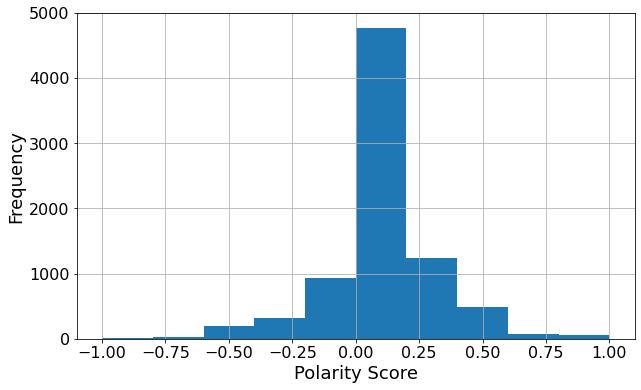

In [15]:
# Histogram of the polarity score
fig = plt.figure(figsize=(10, 6))
tweets_df_filtered['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

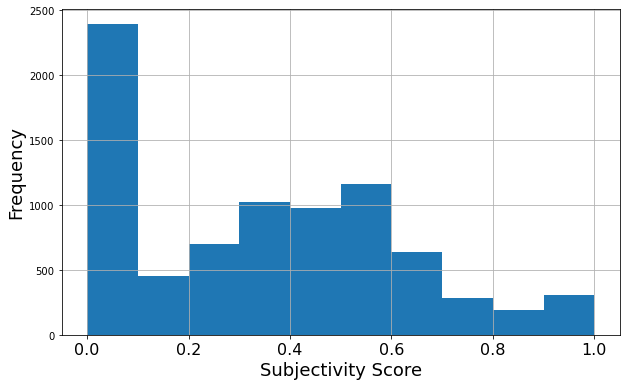

In [16]:
# Histogram of the subjectivity score
fig = plt.figure(figsize=(10, 6))
tweets_df_filtered['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)

**Word Clouds**

Word clouds are created to understand which common topics arise in the tweets and how these topics are perceived by the public.

Code adapted from https://github.com/sejaldua/covid19-vaccy-tweets-NLP/blob/main/workbook.ipynb

In [17]:
# Word Clouds

from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def spell_check(doc):
    spell = SpellChecker()
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud


**Sentiment Labelling**

A sentiment category of negative, neutral or positive is assigned to each tweet based on its sentiment score.

In [19]:
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [tweets_df_filtered['polarity'].between(-1, -0.01), tweets_df_filtered['polarity'].between(-0.01, 0.01), tweets_df_filtered['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
tweets_df_filtered['sentiment'] = np.select(criteria, values, 0)


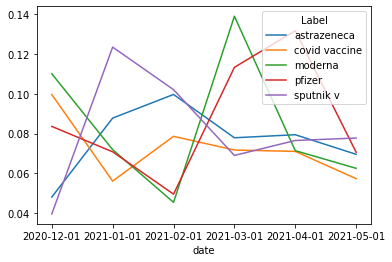

In [59]:
### ANALYSIS WITH RESPECT TO TIME - AS
# Plot of the sentiment variance with respect to time and vaccination brand

temp = tweets_df_filtered[['date', 'polarity', 'Label']]
#print(temp.date.unique())
grouped_df = temp.groupby(['date', 'Label'], as_index= False).mean()
df_pivot = grouped_df.pivot(index="date", columns="Label", values="polarity")

grouped_df.pivot(index="date", columns="Label", values="polarity").plot()


# Alterantive plot with flexible sizing
#plt.figure(figsize=(15, 4))
#plt.plot(df_pivot, label=df_pivot.columns)
#plt.xlabel('Date', fontsize=14)
#plt.ylabel('Avg. sentiment score', fontsize=14)
#plt.legend(loc="upper left")
#plt.show()


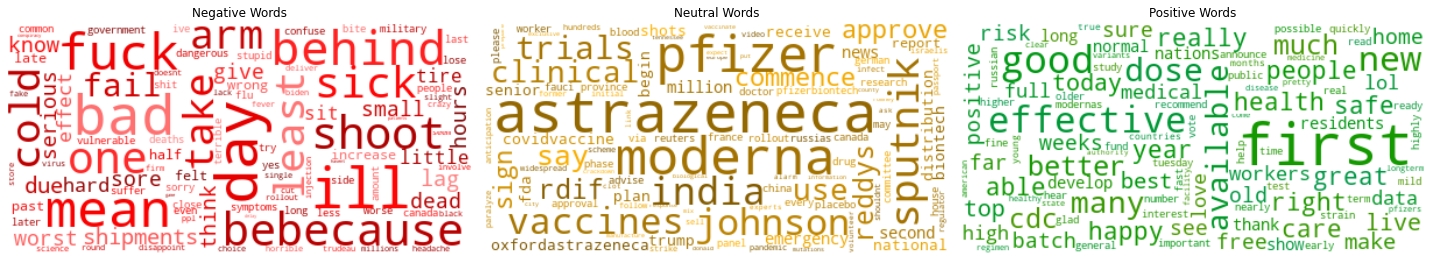

In [21]:
def get_smart_clouds(tweets_df_filtered):

    neg_doc = flatten_list(tweets_df_filtered[tweets_df_filtered['sentiment']=='negative']['Lemmatized Tweet'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(tweets_df_filtered[tweets_df_filtered['sentiment']=='positive']['Lemmatized Tweet'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(tweets_df_filtered[tweets_df_filtered['sentiment']=='neutral']['Lemmatized Tweet'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = spell_check(neg_doc)
    neu_doc_clean = spell_check(neu_doc)
    pos_doc_clean = spell_check(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig


# Convert string to a list of words
tweets_df_filtered['words'] = tweets_df_filtered.content.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(tweets_df_filtered).savefig("sentiment_wordclouds.png", bbox_inches="tight") 

### Feature Extraction, Train-Test Splot & SMOTE

Feature extraction is achieved with the use of the Count Vectorizer. Train-Test split is also carried out in this section. SMOTE is implemented in order to counteract the discovered class imbalance.

In [22]:
## FEATURE EXTRACTION 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X=vectorizer.fit_transform(tweets_df_filtered['Processed Tweet'])
#print(vectorizer.get_feature_names())

y=tweets_df_filtered['sentiment']
y.shape


(8126,)

In [23]:
## TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

In [24]:
## CLASS IMBALANCE

from imblearn.over_sampling import SMOTE

#sentiment counts
print('before SMOTE \n',tweets_df_filtered.sentiment.value_counts())

# transform the dataset
oversample = SMOTE()
X_train_smote,y_train_smote = oversample.fit_resample(X_train,y_train)

#check if sentiments are now equally distributed
print('\n after SMOTE \n',y_train_smote.value_counts())


before SMOTE 
 positive    3858
neutral     2796
negative    1472
Name: sentiment, dtype: int64

 after SMOTE 
 neutral     3066
positive    3066
negative    3066
Name: sentiment, dtype: int64


### Multinomial Naives Bayes Classifier

The basic idea of Naive Bayes technique is to find the probabilities of classes assigned to texts by using the joint probabilities of words and classes. Here, the words are the tweets and the classes are the sentiment categories (positive, neutral, negative).

the following code is adapted from https://github.com/zackhr/Twitter-Sentiment-Analysis-Covid-19/blob/main/project_twitter.ipynb
or shorter: https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk



/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


CPU times: user 735 ms, sys: 2.03 ms, total: 737 ms
Wall time: 731 ms
Parameters selected by grid search:  {'alpha': 0.25}
              precision    recall  f1-score   support

    Negative       0.45      0.64      0.53       298
     Neutral       0.80      0.66      0.72       536
    Positive       0.80      0.78      0.79       792

    accuracy                           0.71      1626
   macro avg       0.69      0.69      0.68      1626
weighted avg       0.74      0.71      0.72      1626

accuracy 71 %


Text(33.0, 0.5, 'Data')

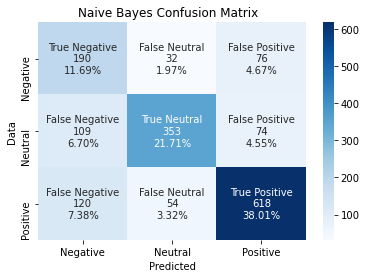

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

NB_classifier=MultinomialNB()

# Use Gridsearch to explore combinations of parameters and tune hyperparameters
param_grid = {'alpha': [0, 0.1, 0.25, 0.5, 0.75, 1.0]}

grid = GridSearchCV(NB_classifier, param_grid= param_grid)

# fit the model with data
%time grid.fit(X_train_smote,y_train_smote)
print("Parameters selected by grid search: ", grid.best_params_)
#print("Most informative features: ", grid.show_most_informative_features(20))

# evaluate the performance on the test set
y_predict = grid.predict(X_test)

# show classification report
target_names=['Negative','Neutral' ,'Positive']
Classification_report = classification_report(y_test,y_predict, target_names=target_names)
print(Classification_report)

accuracy=grid.score(X_test,y_test)
print('accuracy',int(round(accuracy*100)),'%')

# plot contigency table
cm=confusion_matrix(y_test,y_predict)
group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax= plt.subplot()
ax.set_title('Naive Bayes Confusion Matrix  ');
sns.heatmap(cm, annot=labels,ax=ax, fmt='', cmap='Blues')

ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

plt.xlabel('Predicted')
plt.ylabel('Data')

### Support Vector Machine

An SVC model creates a hyperplane which aims to maximize the margin between the classes. 

CPU times: user 12.5 s, sys: 939 ms, total: 13.5 s
Wall time: 33.5 s
Parameters selected by grid search:  {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
              precision    recall  f1-score   support

    Negative       0.48      0.63      0.54       298
     Neutral       0.80      0.71      0.75       536
    Positive       0.89      0.85      0.87       792

    accuracy                           0.76      1626
   macro avg       0.72      0.73      0.72      1626
weighted avg       0.78      0.76      0.77      1626

accuracy 76 %


Text(33.0, 0.5, 'Data')

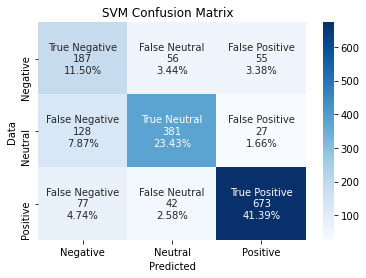

In [26]:
from sklearn.svm import SVC

svc = SVC()

# GridSearchCV previously selected linear kernel from ['linear', 'rbf', 'poly']
param_grid = {'kernel': ['linear'], 
             'C': [0.1, 1, 10],
             'gamma': [0.01, 0.1, 1]}
            
grid = GridSearchCV(svc, param_grid=param_grid, n_jobs = -1)

%time grid.fit(X_train_smote, y_train_smote)
print("Parameters selected by grid search: ", grid.best_params_)

y_predict = grid.predict(X_test)

# show classification report
target_names=['Negative','Neutral' ,'Positive']
Classification_report = classification_report(y_test,y_predict, target_names=target_names)
print(Classification_report)

accuracy=grid.score(X_test,y_test)
print('accuracy',int(round(accuracy*100)),'%')

# plot contigency table
cm=confusion_matrix(y_test,y_predict)
group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax= plt.subplot()
ax.set_title('SVM Confusion Matrix  ');
sns.heatmap(cm, annot=labels,ax=ax, fmt='', cmap='Blues')

ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

plt.xlabel('Predicted')
plt.ylabel('Data')

### Multinomial Logistic Regression

A Logistic Regression Model generates a conditional probability that a sample belongs to a certain class based on its corresponding feature values.

CPU times: user 12min 47s, sys: 46min 31s, total: 59min 19s
Wall time: 1min 52s
Parameters selected by grid search:  {'C': 10, 'solver': 'saga'}
              precision    recall  f1-score   support

    Negative       0.54      0.61      0.57       298
     Neutral       0.78      0.78      0.78       536
    Positive       0.89      0.85      0.87       792

    accuracy                           0.78      1626
   macro avg       0.74      0.74      0.74      1626
weighted avg       0.79      0.78      0.78      1626

accuracy 78 %


Text(33.0, 0.5, 'Data')

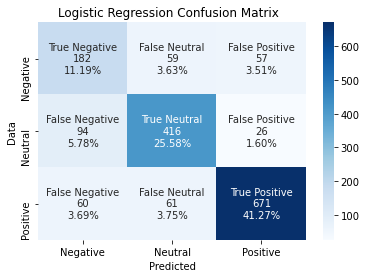

In [27]:
from sklearn.linear_model import LogisticRegression

logmod=LogisticRegression(multi_class = 'multinomial', max_iter=5000)

# Build GridSearch Pipeline
param_grid = {
            #'penalty': ['l1', 'l2'],
            'C': [0.1, 1.0, 10],
            'solver': ['sag', 'saga', 'lbfgs']}

grid = GridSearchCV(logmod, param_grid= param_grid)

# fit the model with data
%time grid.fit(X_train_smote,y_train_smote)
print("Parameters selected by grid search: ", grid.best_params_)

# evaluate the performance on the test set
y_predict = grid.predict(X_test)

# show classification report
target_names=['Negative','Neutral' ,'Positive']
Classification_report = classification_report(y_test,y_predict, target_names=target_names)
print(Classification_report)

accuracy=grid.score(X_test,y_test)
print('accuracy',int(round(accuracy*100)),'%')

# plot contigency table
cm=confusion_matrix(y_test,y_predict)
group_names = ["True Negative","False Neutral","False Positive","False Negative","True Neutral","False Positive","False Negative","False Neutral","True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax= plt.subplot()
ax.set_title('Logistic Regression Confusion Matrix  ');
sns.heatmap(cm, annot=labels,ax=ax, fmt='', cmap='Blues')

ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

plt.xlabel('Predicted')
plt.ylabel('Data')

### Summarize

The core idea of summaries is generating new sentences to summarize the text.

In [28]:
import numpy as np
import pandas as pd
!pip install nltk
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
import re

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# transform tweets to adjust formatting
sentences = []
sum_tweets = tweets_df_filtered['Processed Tweet']

for tweet in sum_tweets:
    sentences.append(sent_tokenize(tweet))

# flatten the list
sentences = [y for x in sentences for y in x]

# convert to pandas series
clean_sentences = pd.Series(sentences)

In [30]:
# Download the nltk English language stopwords library
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(sen):
  sen_new = " ".join([i for i in sen if i not in stop_words])
  return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# download pretrained GloVe word embeddings
! wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-14 20:59:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-14 20:59:53--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-14 20:59:54--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [32]:
! unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [33]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

#Create vector
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

len(sentence_vectors)

8116

In [34]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

# Rank the sentences using Page Rank
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [46]:
# Sort the rankings to determine most important sentences
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

# Specify number of sentences to form the summary
sn = 6
covid_summary=[]
# Generate summary
for i in range(sn):
    covid_summary.append(ranked_sentences[i][1])
  #print(ranked_sentences[i][1])


In [48]:
covid_summary = '. '.join(covid_summary)
tb_summary = TextBlob(covid_summary)
print(tb_summary.sentiment)
covid_summary

Sentiment(polarity=0.13381542699724516, subjectivity=0.3807277318640955)


'i have no problem with uk one jab strategy its just to get same protection levels as az then you need second pfizer dose which we will get  i have taken immunosuppression drugs for 25 years so vaccines not likely to help much anyway. the evaluation also seems to be that with the oxfordastrazeneca vaccine the efficacy of the second shot increases with a bigger time gap too the main target is to keep people out of hospital most people will i think get the oxford not pfizer vaccine. so we finally get two vaccines and then the tories manage to  fck up the schedule of vaccinations  first they delay  the second pfizer dose and now theyre planning to give us the cheaper oxford vaccine instead no one knows if well be protected or not toryshambles. covid vaccines roll out must be paused to investigate recent spike in covid positives and deaths 7 die at spanish care home after getting pfizer covid jab as all residents test positive for virus second doses still to come  rt world news. please can

### Text Generation with LSTM

LSTM is especially suited for text generation because it is able to address when an older word should continue to hold importance. In the case of this analysis, it utilizes a cleaned, tokenized, and flattened dataset consisting only of the content of the Tweets.

In [50]:
# function to format the input
def df_str(df):
    result = []
    for line in df:
        result += line.strip().split(',')
    return str(result)
    
# Use clean_sentences with stop words removed from summary extraction above
lstm_text = df_str(clean_sentences)
#print(lstm_text)


In [54]:
#!pip install keras
#!pip install tensorflow
#!pip install np_utils
from numpy import array
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

# generate a sequence from the model based on seed text and # of words
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate the requested number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = array(encoded)
        # predict a word in the vocabulary
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [55]:
tokenizer = Tokenizer()
# integer encode text
tokenizer.fit_on_texts([lstm_text])
encoded = tokenizer.texts_to_sequences([lstm_text])[0]
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create word sequences
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
#print('sequence: ', sequences)

# split into X and y elements
sequences = array(sequences)
X, y = sequences[:,0],sequences[:,1]

# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    #word_embeddings taken from summarization section
    embedding_vector = word_embeddings.get(word) 
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# define model and add layers
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

# compile model and set parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model.fit(X, y, epochs=30, verbose=2)


Vocabulary Size: 18142
Total Sequences: 123061
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            1814200   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 18142)             925242    
Total params: 2,769,642
Trainable params: 955,442
Non-trainable params: 1,814,200
_________________________________________________________________
None
Epoch 1/30
3846/3846 - 71s - loss: 8.1836 - accuracy: 0.0485
Epoch 2/30
3846/3846 - 35s - loss: 7.4126 - accuracy: 0.0689
Epoch 3/30
3846/3846 - 35s - loss: 7.0203 - accuracy: 0.0811
Epoch 4/30
3846/3846 - 35s - loss: 6.7764 - accuracy: 0.0891
Epoch 5/30
3846/3846 - 35s - loss: 6.6020 - accuracy: 0.0954
Epoch 6/30
38

/opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


covid vaccine rollout unacceptably slow tortoise virtually covid vaccine


In [60]:
# generate an output text with seed text 'covid'
print(generate_seq(model, tokenizer, 'covid', 8))

/opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


covid vaccine rollout unacceptably slow tortoise virtually covid vaccine


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d16cae8c-e6ac-41c1-a37c-b8f3a782bcdb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>